In [12]:
# import dependencies
import pandas as pd
import numpy as np
from sklearn import preprocessing, cross_validation, svm
from sklearn.linear_model import LinearRegression
import quandl as Quandl
import matplotlib as plt
import warnings

# notebook settings
plt.style.use('ggplot')
warnings.filterwarnings('ignore')
%matplotlib inline

In [13]:
# get some stock data
df = Quandl.get('WIKI/GOOGL')

In [14]:
# inspect the head
df.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2004-08-19,100.01,104.06,95.96,100.335,44659000.0,0.0,1.0,50.159839,52.191109,48.128568,50.322842,44659000.0
2004-08-20,101.01,109.08,100.50,108.310,22834300.0,0.0,1.0,50.661387,54.708881,50.405597,54.322689,22834300.0
2004-08-23,110.76,113.48,109.05,109.400,18256100.0,0.0,1.0,55.551482,56.915693,54.693835,54.869377,18256100.0
2004-08-24,111.24,111.60,103.57,104.870,15247300.0,0.0,1.0,55.792225,55.972783,51.945350,52.597363,15247300.0
2004-08-25,104.76,108.00,103.88,106.000,9188600.0,0.0,1.0,52.542193,54.167209,52.100830,53.164113,9188600.0


In [15]:
# inspect the tail
df.tail()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2017-08-16,941.25,949.9000,940.0391,944.27,1329301.0,0.0,1.0,941.25,949.9000,940.0391,944.27,1329301.0
2017-08-17,942.95,943.8100,927.6400,927.66,1653779.0,0.0,1.0,942.95,943.8100,927.6400,927.66,1653779.0
2017-08-18,926.98,931.0200,923.4500,926.18,1327288.0,0.0,1.0,926.98,931.0200,923.4500,926.18,1327288.0
2017-08-21,925.77,928.2500,918.6000,920.87,1292624.0,0.0,1.0,925.77,928.2500,918.6000,920.87,1292624.0
2017-08-22,926.96,941.9617,926.1700,940.40,1711377.0,0.0,1.0,926.96,941.9617,926.1700,940.40,1711377.0


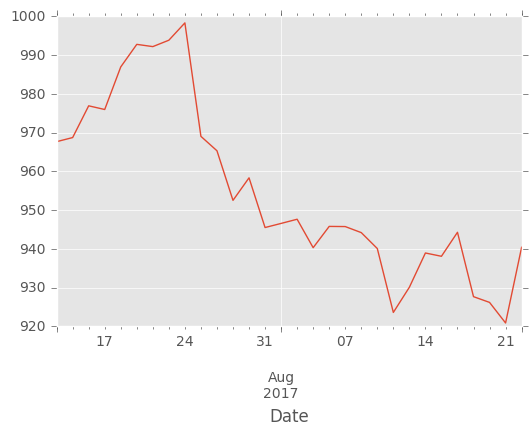

In [16]:
# closing price for last 30 days
df['Close'].tail(30).plot()

In [17]:
# only keep the features that we care about
df = df[['Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Close', 'Adj. Volume']]
df['H/L Pct'] = (df['Adj. High'] - df['Adj. Close']) / df['Adj. Close'] * 100.0
df['Pct Change'] = (df['Adj. Close'] - df['Adj. Open']) / df['Adj. Open'] * 100.0
df = df[['Adj. Close', 'H/L Pct', 'Pct Change', 'Adj. Volume']]

In [20]:
# quick look at our new frame
df.tail()

,Adj. Close,H/L Pct,Pct Change,Adj. Volume
Date,,,,
2017-08-16,944.27,0.596228,0.320850,1329301.0
2017-08-17,927.66,1.740940,-1.621507,1653779.0
2017-08-18,926.18,0.522577,-0.086302,1327288.0
2017-08-21,920.87,0.801416,-0.529289,1292624.0
2017-08-22,940.40,0.166068,1.449901,1711377.0


In [19]:
# remove NaNs
df.fillna(-9999, inplace=True)